<a href="https://colab.research.google.com/github/ChintaLokesh/Deep_Learning_Neural_Network/blob/master/Modified_Version_of_NN_cats_vs_Dog_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import kaggle

In [2]:
# ! mv kaggle.json /root/.kaggle

In [3]:
# ! kaggle competitions download -c dogs-vs-cats

In [4]:
# ! unzip dogs-vs-cats.zip

In [5]:
# ! unzip train.zip

In [6]:
! pip show opencv-python

Name: opencv-python
Version: 4.6.0.66
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
def readImage(name):
  image=cv2.imread("train/"+name)
  plt.imshow(image)

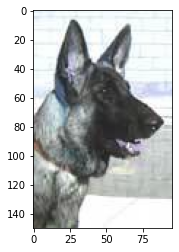

In [9]:
readImage("dog.9999.jpg")

In [10]:
import os

In [11]:
x_train =[]
y_train=[]
for filename in os.listdir("train"):
  image=cv2.imread("train/"+filename)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(150,150))
  x_train.append(image)
  if "cat" in filename:
    y_train.append(0)
  else:
    y_train.append(1)


In [12]:
len(x_train)

25000

In [13]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)

In [14]:
print(x_train.shape)
print(y_train.shape)

(25000, 150, 150, 3)
(25000,)


In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.95)

In [19]:
x_train = x_train /255.0
y_train = tf.keras.utils.to_categorical(y_train)

In [21]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [28]:
model=tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Input((150,150,3),name="Input"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation=tf.keras.activations.relu,name="Hidden_Layer"))
model.add(tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax))

In [31]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics=["acc"])

In [34]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
40/40 [==============================] - 2s 49ms/step - loss: 0.6922 - acc: 0.5312
Epoch 2/5
40/40 [==============================] - 2s 47ms/step - loss: 0.6844 - acc: 0.5912
Epoch 3/5
40/40 [==============================] - 2s 48ms/step - loss: 0.6823 - acc: 0.5680
Epoch 4/5
40/40 [==============================] - 3s 64ms/step - loss: 0.6734 - acc: 0.5616
Epoch 5/5
40/40 [==============================] - 3s 64ms/step - loss: 0.6776 - acc: 0.5736


In [35]:
y_test= tf.keras.utils.to_categorical(y_test)

In [40]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [43]:
x_test.shape

(23750, 150, 150, 3)

In [44]:
y_test.shape

(23750, 2)

In [ ]:
def predict(num):
  plt.imshow(x_test[num])
  print(f"actual value is: {y_test[num][0]}")
  if(y_test[num][1] == 1.0):
    print(f"actual Label for {y_test[num][1]} is DOG")
  else:
    print(f"actual Label for {y_test[num][1]} is CAT")
  image=x_test[num]
  image=image /255.0
  image=np.expand_dims(image,axis=0)
  result=model.predict(image)
  print(f"result is:{result}")                               
  print(f"model predicted : {np.argmax(result)} with confidence of {np.round(result.max()*100,2)}")

In [56]:
def predict(num):
  print(y_test[num][1])
  if(y_test[num][1] == 1.0):
    print(f"Actual name is: DOG")
  else:
    print(f"Actual name is: CAT")
  plt.imshow(x_test[num])
  image=x_test[num]
  image = image / 255.0
  image=np.expand_dims(image,axis=0)
  result=model.predict(image)
  if(np.argmax(result) == 0):
    finalpredictedname="CAT"
  else:
    finalpredictedname="CAT"
  print( f"model predicted {finalpredictedname} with confidence {np.round(result.max()*100,2)}")


0.0
Actual name is: CAT
1/1 [==============================] - 0s 52ms/step
model predicted CAT with confidence 50.33


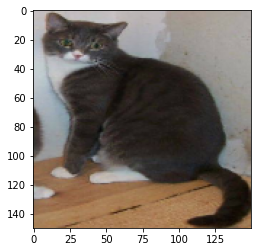

In [57]:
predict(123)